In [217]:
import numpy as np
from numpy import linalg
from numpy import inf



def polynomial_kernel(x, y, p=2):
    return (np.dot(x, y)) ** p


class KernelPerceptron(object):

    def __init__(self, kernel=linear_kernel, T=1):
        self.kernel = kernel
        self.T = T

    def fit(self, X, y):
        n_samples, n_features = X.shape
        #np.hstack((X, np.ones((n_samples, 1))))
        self.alpha = np.zeros(n_samples, dtype=np.float64)
        self.b = 0
        self.R=(linalg.norm(X, inf)) ** 2

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])
        print(type(K))
       
        for t in range(self.T):
            for i in range(n_samples):
                at_inter=0
                #inter=np.sum(K[:,i]*self.alpha*y)
                #print("Value is inter is:",inter)
                #a_inter=np.sum(K[:,i] * self.alpha * y)+self.b
                #print("a inter is:", a_inter)
                #at_inter=(np.sign((np.sum(K[:,i] * self.alpha * y)+np.all(self.b))*y[i])
                #at_inter = [(np.sign((np.sum(K[:,i] * self.alpha * y)+np.all(self.b))*y[i]) for j in range(n_samples)]
                #print("at_inter is:", at_inter)
                #at_inter=0
                for j in range(n_samples):
                    at_inter+=((K[j,i] * self.alpha[j]*y[j])+np.all(self.b))
                    #at_inter=(((K[i,j] * self.alpha[i] * y[j])+np.all(self.b))*y[i])
                #print("at_inter is",at_inter)
                    #print("y is",y[i])
                    if np.sign((at_inter)*y[i]) != 1:
                
                        #print("alpha before:", self.alpha)
                        self.alpha[i] += 1
                        #print("alpha after:", self.alpha)
                        #self.b+=self.R*y[i]
                        self.b += y[i]*((linalg.norm(X[j], np.inf))**2)

        # Support vectors
        #sv=self.alpha
        sv = self.alpha > 1e-5
        print("alpha after:", self.alpha)
        #sv = self.alpha > -1
        #print("support vector is:",sv)
        #print(len(self.alpha))
        #print([sv])
        ind = np.arange(len(self.alpha))[sv]
        #print("ind is:", ind)
        self.alpha = self.alpha[sv]
        print("self alphs is:", self.alpha[sv])
        self.sv = X[sv]
        #print("self sv is:",X[sv])
        self.sv_y = y[sv]
        #print("self sy is:",y[sv])
        print("%d support vectors out of %d points" % (len(self.alpha),
                                                       n_samples)) 
    def project(self, X):
        print("Project X is :",X)
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            bb= self.b
            #print("project alphs is :", self.alpha)
            #print("project sv_y is :", self.sv_y)
            #print("project sv is :", self.sv)
            for a, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                #print("value os s is :",s)
                s += (a * sv_y * self.kernel(X[i], sv))+np.all(bb)
                #print("type os alpha:", type(a))
                #print(a)
                #print("y value is:", sv_y)
                #print("sv is", sv)
                #print("value is X[i] is:", X[i])
                #print("S value is:",s)
            #print(y_predict[i])
            #print("type of s :", type(s))
            #print("type of y_predict[i]:", type(y_predict[i]))
            y_predict[i] = s
            print("y_predict is :", y_predict)
        return y_predict

    def predict(self, X):
        X = np.atleast_2d(X)
        n_samples, n_features = X.shape
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl
    def test_kernel():
        
        X_train, y_train = np.array([[-0.5,1],[-1,-1.5],[-1.5,1.5],[1.5,-0.5],[0.5,-0.5]]),np.array([-1,1,1,1,-1])
        #X_test, y_test = np.array([[-0.5,1],[-1,-1.5],[-1.5,1.5],[1.5,-0.5],[0.5,-0.5]]),np.array([-1,1,1,1,-1])
        X_test, y_test = np.array([[-0.5,1]]), np.array([-1])
        clf = KernelPerceptron(polynomial_kernel, T=1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        #print(y_predict)
        correct = np.sum(y_predict == y_test)
        print ("%d out of %d predictions correct" % (correct, len(y_predict)))

        #plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    test_kernel()


<class 'numpy.ndarray'>
alpha after: [5. 1. 2. 2. 3.]
self alphs is: [5. 1. 2. 2. 3.]
5 support vectors out of 5 points
Project X is : [[-0.5  1. ]]
y_predict is : [9.75]
0 out of 1 predictions correct


In [110]:
import numpy
numpy.sign(12)

1

4 support vectors out of 5 points
4 out of 5 predictions correct


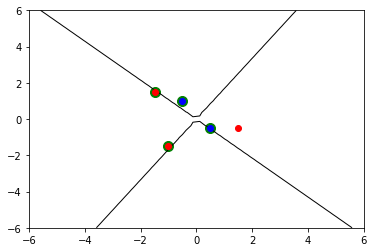

In [179]:
import numpy as np
from numpy import linalg

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=2):
    return ( np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))


class Perceptron(object):

    def __init__(self, T=1):
        self.T = T

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features, dtype=np.float64)
        self.b = 0.0

        for t in range(self.T):
            for i in range(n_samples):
                if self.predict(X[i])[0] != y[i]:
                    self.w += y[i] * X[i]
                    self.b += y[i]

    def project(self, X):
        return np.dot(X, self.w) + self.b

    def predict(self, X):
        X = np.atleast_2d(X)
        return np.sign(self.project(X))

class KernelPerceptron(object):

    def __init__(self, kernel=linear_kernel, T=1):
        self.kernel = kernel
        self.T = T

    def fit(self, X, y):
        n_samples, n_features = X.shape
        #np.hstack((X, np.ones((n_samples, 1))))
        self.alpha = np.zeros(n_samples, dtype=np.float64)

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        for t in range(self.T):
            for i in range(n_samples):
                if np.sign(np.sum(K[:,i] * self.alpha * y)) != y[i]:
                    self.alpha[i] += 1.0

        # Support vectors
        sv = self.alpha > 1e-5
        ind = np.arange(len(self.alpha))[sv]
        self.alpha = self.alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.alpha),
                                                       n_samples))

    def project(self, X):
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            for a, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                s += a * sv_y * self.kernel(X[i], sv)
            y_predict[i] = s
        return y_predict

    def predict(self, X):
        X = np.atleast_2d(X)
        n_samples, n_features = X.shape
        #np.hstack((X, np.ones((n_samples, 1))))
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()


    def test_kernel():
        #X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = np.array([[-0.5,1],[-1,-1.5],[-1.5,1.5],[1.5,-0.5],[0.5,-0.5]]),np.array([-1,1,1,1,-1])
        X_test, y_test = np.array([[-0.5,1],[-1,-1.5],[-1.5,1.5],[1.5,-0.5],[0.5,-0.5]]),np.array([-1,1,1,1,-1])

        clf = KernelPerceptron(polynomial_kernel, T=20)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict))) 

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    test_kernel()